#**APRENDIZAJE AUTOMÁTICO - MIGUEL MARINES**
##**<u>Regresión Lineal, RSME, MAE y MAPE</u>**
---
---

**NOTA:** Se trabaja con el archivo "california_housing_train.csv".

In [ ]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# Ruta del directorio que se desea establecer como directorio de trabajo.
# Se cambia el directorio de trabajo actual al especificado en la variable "DIR".
DIR = "/content/sample_data/"
os.chdir(DIR)

# Carga de archivo CSV.
misdatos = pd.read_csv("california_housing_train.csv", sep = ",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Ejercicio - 1: Matriz de Correlación de Pearson**

En este ejercicio se despliega la matriz de correlación de las variables del dataframe "misdatos", incluyendo en cada celda de la matriz el valor numérico de la correlación entre cada par de variables.

Al desplegar la matriz de correlación se usa la opción del mapa de calor (heatmap) de la librería seaborn, usando el mapa de color 'BuGn'.

Se puede consultar la siguiente documentación:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


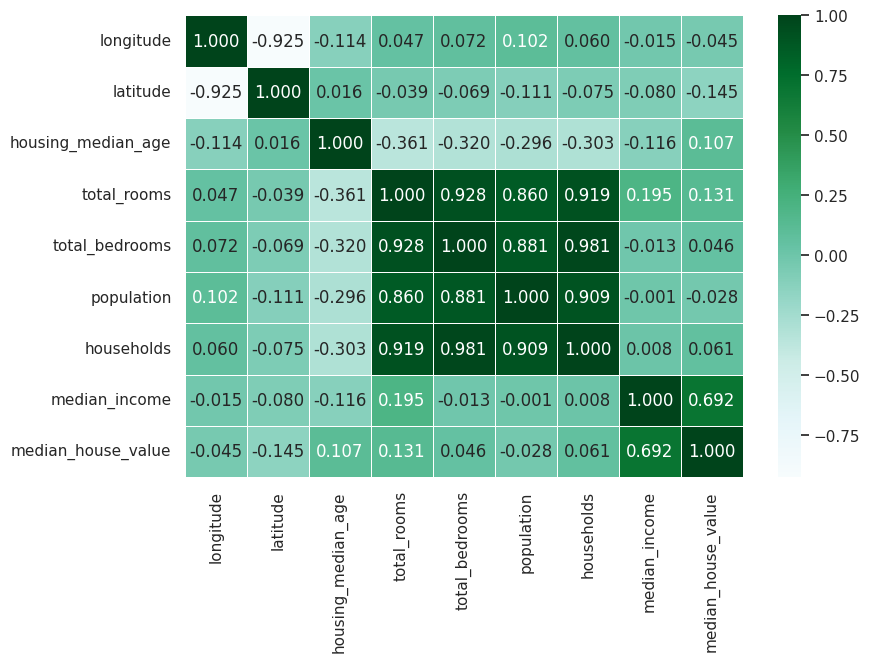

In [ ]:
# Se establece el tamaño de la figura.
sns.set(rc = {'figure.figsize': (9, 6)})

# Se calcula la matriz de correlación de los datos.
matriz_correlacion = misdatos.corr()
# Se crea el heatmap.
sns.heatmap(matriz_correlacion, annot = True, cmap = 'BuGn', fmt = ".3f", linewidths = .5)

# Se muestra la visualización.
plt.show()

#**Ejercicio - 2: Transformaciones e Hisotgramas de Variables**

En este ejercicio se trabaja solamente con las siguientes 7 variables:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

A cada una de dichas columnas se les aplican las siguientes transformaciones y se despliegan sus histogramas con 20 barras (bins):

*   Raíz cuadrada con Numpy.
*   Logaritmo natural con Numpy.
*   Potencia 2 (i.e., elevar al cuadrado) con Numpy.
*   Box-Cox con scikit-learn.


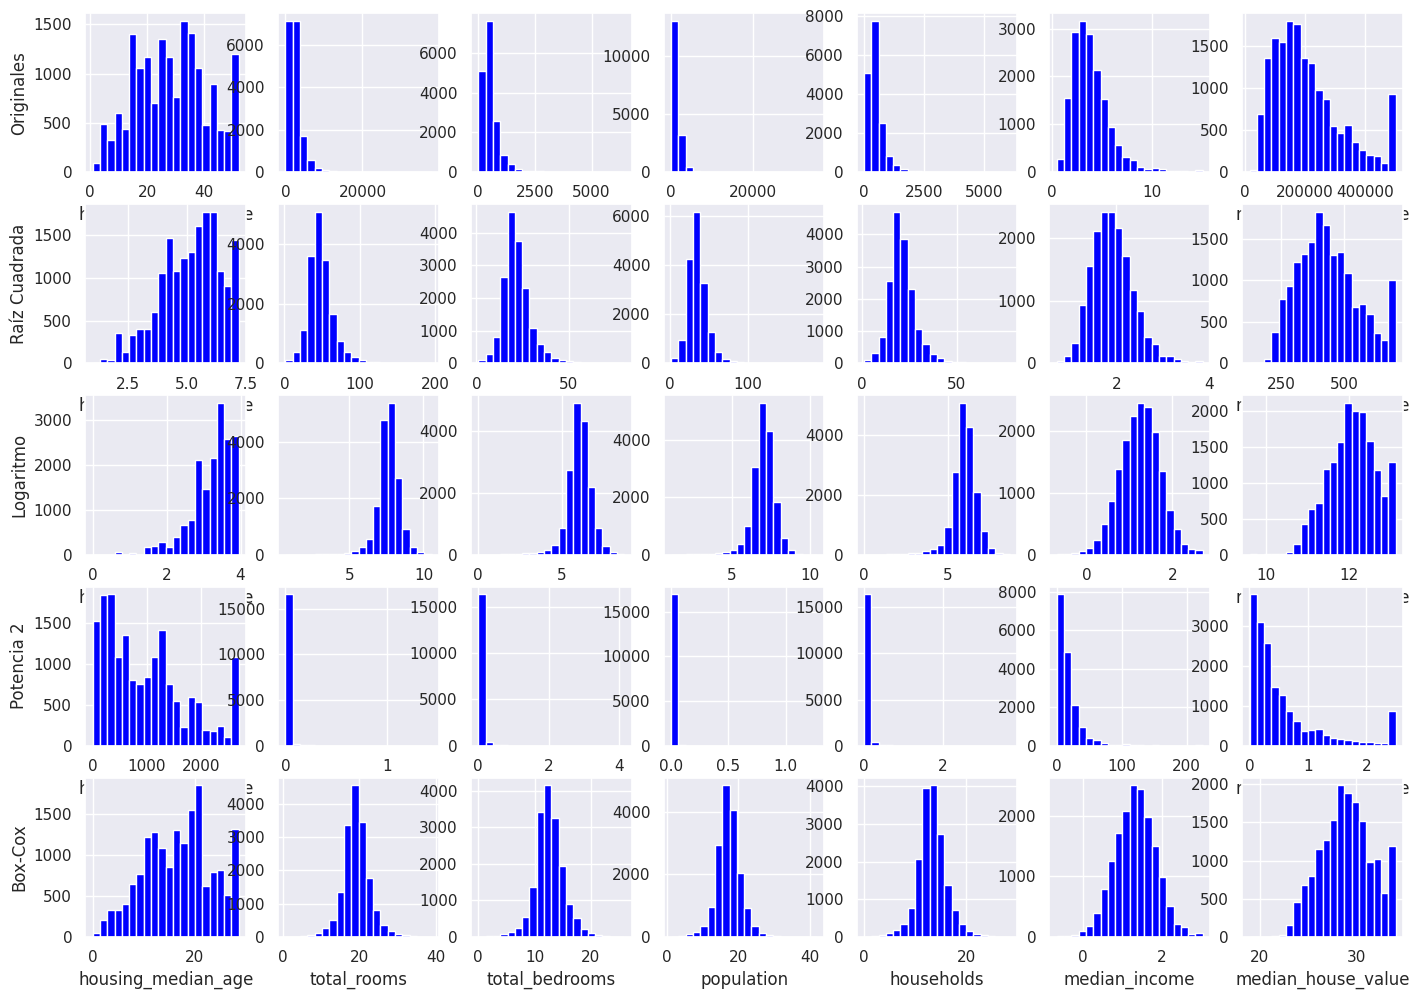

In [ ]:
# Lista de las 7 variables a trabajar en el ejercicio.
variables_a_transformar = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


# Se establece el tamaño de la figura y sus ejes.
sns.set(rc = {'figure.figsize':(17, 12)})
fig, axes = plt.subplots(5, 7)


# Se itera sobre las 7 variables.
for k in range(0, 7):

    # Datos originales ---------------------------------------------------------
    plt.subplot(5, 7, k+1)

    #  Se asigna a Transf0 los valores de cada variable "k" sin transformar.
    Transf0 = misdatos[variables_a_transformar[k]]
    #  Histograma de Transf0 con 20 barras (bins).
    plt.hist(Transf0, bins = 20, color = 'blue')


    # Se agrega a la visualización.
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
      plt.ylabel('Originales')



    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5, 7, k+8)

    #  Se aplica la raíz cuadrada a los valores de cada variable "k" sin transformar.
    Transf1 = np.sqrt(misdatos[variables_a_transformar[k]])
    #  Histograma de Transf1 con 20 barras (bins).
    plt.hist(Transf1, bins = 20, color = 'blue')


    # Se agrega a la visualización.
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
      plt.ylabel('Raíz Cuadrada')



    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5, 7, k+15)

    #  Se aplica el logaritmo natural a los valores de cada variable "k" sin transformar.
    Transf2 = np.log(misdatos[variables_a_transformar[k]])
    #  Histograma de Transf2 con 20 barras (bins).
    plt.hist(Transf2, bins = 20, color = 'blue')


    # Se agrega a la visualización.
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
      plt.ylabel('Logaritmo')



    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5, 7, k+22)

    #  Se eleva al cuadrado los valores de cada variable "k" sin transformar.
    Transf3 = np.power(misdatos[variables_a_transformar[k]], 2)
    #  Histograma de Transf3 con 20 barras (bins).
    plt.hist(Transf3, bins = 20, color = 'blue')


    # Se agrega a la visualización.
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
      plt.ylabel('Potencia 2')



    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5, 7, k+29)

    #  Se aplica la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    Transf4 = power_transform(misdatos[variables_a_transformar[k]].values.reshape(-1, 1), method = 'box-cox', standardize = False)
    #  Histograma de Transf4 con 20 barras (bins).
    plt.hist(Transf4, bins = 20, color = 'blue')


    # Se agrega a la visualización.
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
      plt.ylabel('Box-Cox')


# Se muestran los histogramas.
plt.show()

#**Ejercicio - 3 - Métricas de desempeño: $RMSE$, $MAE$ y $MAPE$**


Cada una de de las formulas de las las métricas $RMSE$, $MAE$ y $MAPE$ se puede calcular mediante los valores observados reales $y$, los valores de predicción $\hat{y}$ y el total de registros $n$.

En este ejercicio se define cada una de estas métricas mediante tres funciones que se llaman mi_RMSE, mi_MAE y mi_MAPE.

Cada una de las tres funciones tienen dos argumentos, a saber, los valores observados reales $y$ y los valores de predicción $\hat{y}$.

El valor de retorno es el valor numérico real dado por la fórmula que lo define.

Solamente se hace uso las funciones de NumPy del promedio (mean), cuadrado (square) y valor absoluto (abs), además de las operaciones aritméticas básicas.

In [ ]:
# Función Root Mean Square Error
def mi_RMSE(y_real, y_pred):
  mse = np.mean(np.square(y_real - y_pred))
  rmse = np.sqrt(mse)
  return rmse


# Función Mean Absolute Error
def mi_MAE(y_real, y_pred):
    mae = np.mean(np.abs(y_real - y_pred))
    return mae


# Función Mean Absolute Percentage Error
def mi_MAPE(y_true, y_pred):
    ape = np.abs((y_true - y_pred) / y_true)
    maape = np.mean(ape[np.isfinite(ape)])  # Evitar divisiones entre cero.
    mape = 100 * maape
    return mape

In [ ]:
# Se separa el conjunto de datos en características y la variable objetivo.
Xtrain = misdatos.drop('median_house_value', axis = 'columns')
ytrain = misdatos['median_house_value']

# Pipeline con preprocesamiento para las características numéricas.
num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy = 'median')),
                                        ('scalar', MinMaxScaler(feature_range = (1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

# Variables numéricas que serán transformadas.
numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']


# Transforrmaciones.
columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder = 'passthrough')

# Modelo de regresión lineal.
modelo_LR = LinearRegression()

# Listas para almacenar los errores.
scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

# Validación cruzada con 10 divisiones.
kf = KFold(n_splits = 10, shuffle = True)

# Validación Cruzada
for train_index, val_index in kf.split(Xtrain):

  # Se dividen los datos en conjuntos de entrenamiento y validación.
  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  # Se ajusta y se transforma el preprocesamiento a los datos de entrenamiento.
  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  # Se entrena el modelo de regresión lineal con los datos de entrenamiento transformados.
  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)

  # Se transforman los datos de validación evitando el filtrado de información.
  XvalTransf = XtrainFit.transform(X_val)

  # Se hacen predicciones.
  yhatVal = modelo_LR.predict(XvalTransf)

  # Se calculan los errores.
  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Listas con los errores.
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

# Se muestran los resultados.
print("\t  %s\t\t%s   \t\t%s" % (names[0], names[1], names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  65115.5 		48831.8  		30.3%
fold[2]:  67674.2 		49639.3  		29.8%
fold[3]:  70070.6 		51802.2  		30.6%
fold[4]:  66197.6 		49664.7  		31.1%
fold[5]:  66215.7 		48841.2  		29.1%
fold[6]:  69993.0 		50654.2  		29.4%
fold[7]:  68842.2 		50827.2  		29.5%
fold[8]:  72568.5 		52139.9  		32.0%
fold[9]:  73015.6 		53093.3  		30.3%
fold[10]:  70353.4 		51411.3  		30.0%
mean(std) 69004.6(2555.4)  	50690.5(1366.8)   	30.2% (0.8)
